<a href="https://colab.research.google.com/github/arnavkapasiuf/BME3053C-Spring-2025/blob/main/homework/Homework_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [6]:
#Provide your code for part 1-1 here
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

In [17]:
#Provide your code for part 1-2 here
print("Dataset dimensions:", X.shape)
print("Number of samples:", (X.shape[0]*X.shape[1]))
print("Number of classes:", len(np.unique(y)))

Dataset dimensions: (70000, 784)
Number of samples: 54880000
Number of classes: 10


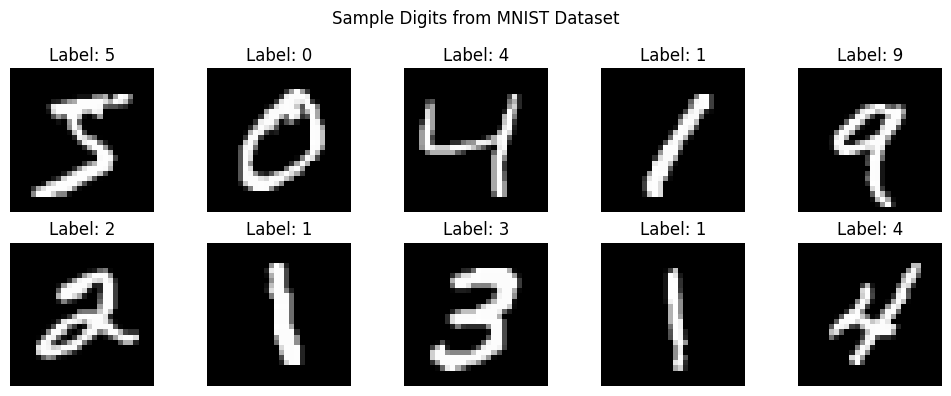

In [8]:
#Provide your code for part 1-3 here
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from MNIST Dataset")
plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [10]:
# Provide your code for part 2 here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_scaled = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [11]:
# Provide your code for part 3-1 here
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_preds = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_preds)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Logistic Regression Accuracy: 0.9156


In [12]:
# Provide your code for part 3-2 here
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), solver='adam', learning_rate_init=0.001, max_iter=20, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_preds = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_preds)
print(f"Neural Network Accuracy: {mlp_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.9711


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


<ipython-input-13-cec4e316590b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='pastel')


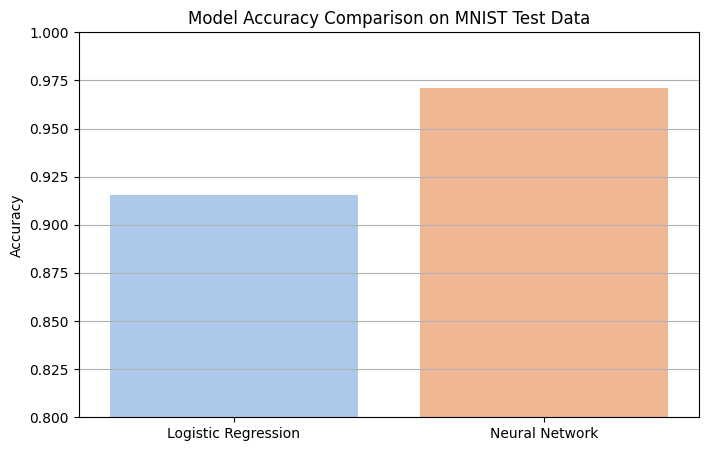

In [13]:
# Provide your code for part 4-1 here
import seaborn as sns

model_names = ['Logistic Regression', 'Neural Network']
accuracies = [logistic_accuracy, mlp_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='pastel')
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison on MNIST Test Data")
plt.grid(True, axis='y')
plt.show()

=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

Confusion Matrix:


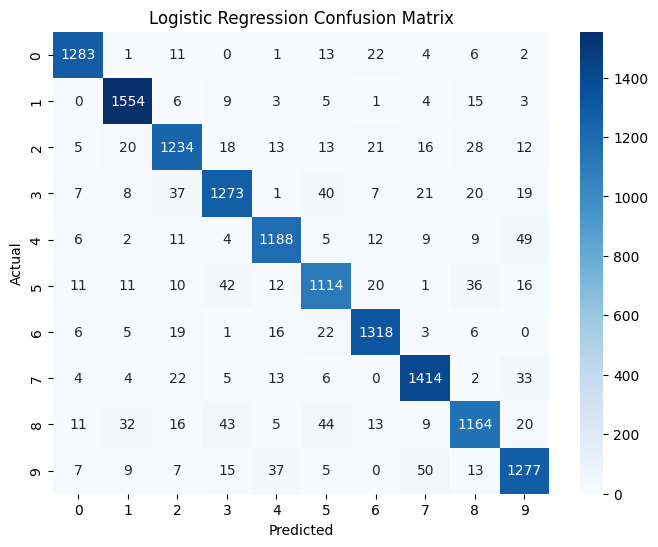


=== Neural Network ===
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.96      0.96      0.96      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.96      0.97      1273
           6       0.97      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:


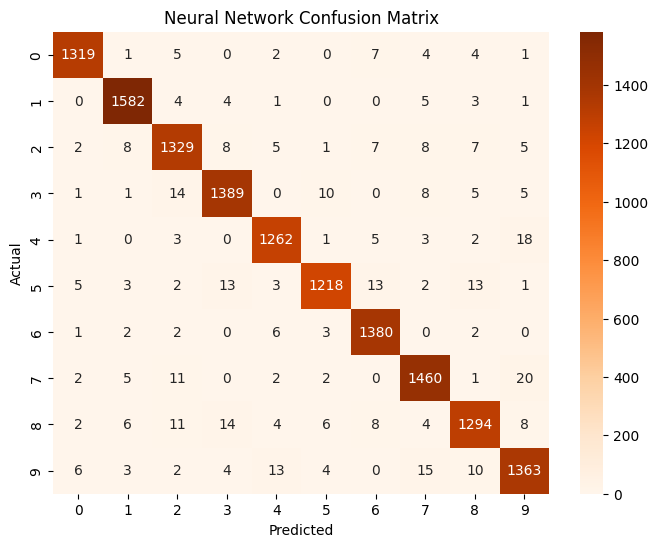

In [14]:
# Provide your code for part 4-2 here
from sklearn.metrics import classification_report, confusion_matrix

print("=== Logistic Regression ===")
print("Classification Report:\n", classification_report(y_test, logistic_preds))
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logistic_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n=== Neural Network ===")
print("Classification Report:\n", classification_report(y_test, mlp_preds))
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, mlp_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

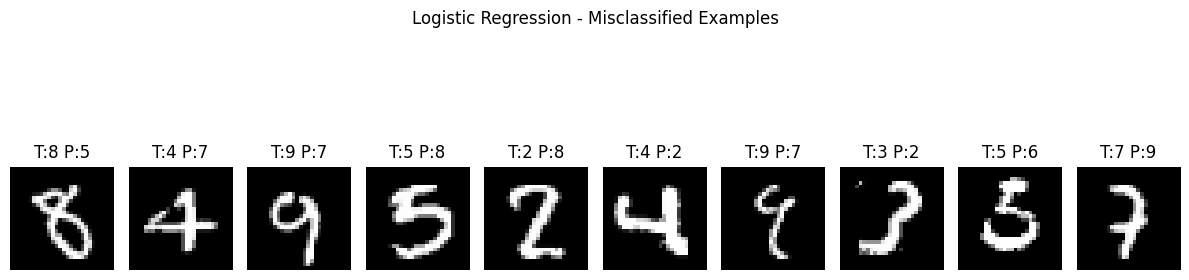

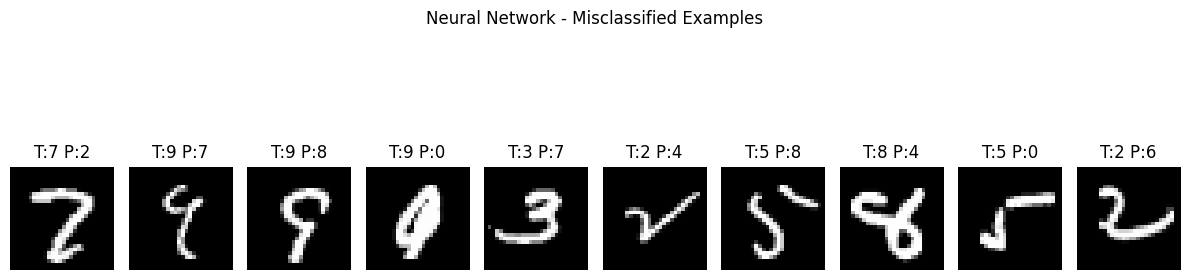

In [15]:
# Provide your code for part 4-3 here
def plot_misclassified(X_data, y_true, y_pred, title, num_samples=10):
    misclassified_indices = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(12, 4))
    for i, idx in enumerate(misclassified_indices[:num_samples]):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X_data[idx].reshape(28, 28), cmap='gray')
        plt.title(f"T:{y_true[idx]} P:{y_pred[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_misclassified(X_test, y_test, logistic_preds, "Logistic Regression - Misclassified Examples")

plot_misclassified(X_test, y_test, mlp_preds, "Neural Network - Misclassified Examples")